## SC1015-Mini Project- Student Spending Analysis

### Team Members

1. Socratees Harshia (U2320903C)
2. Sundar Subramanian Ayngara Sudha (U2321482C)

### Contents

1. Problem and Objective
2. Data preparation and cleaning
3. Explaratory Data Analysis
4. (Something new)
5. Findings and summary

## Problem and Objective

Predictive Analysis of Student Spending Patterns to Enhance Financial Planning

The goal is to analyze and predict student spending behaviors based on various demographic and academic factors. 

## Data attributes: 
Demographic Information: Age, Gender, Area of Study

Financial Data: Monthly Income (part-time jobs, stipends), Monthly Expenses (food, rent, entertainment, utilities, academic materials)

Academic Information: Full-time/Part-time status, Year of study

Spending Categories: Percentage of income spent on various categories

## STEP 1: Cleaning

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()

In [2]:
#Import dataset
habits = pd.read_csv('train.csv')
habits.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [3]:
habits.dtypes

Unnamed: 0                   int64
age                          int64
gender                      object
year_in_school              object
major                       object
monthly_income               int64
financial_aid                int64
tuition                      int64
housing                      int64
food                         int64
transportation               int64
books_supplies               int64
entertainment                int64
personal_care                int64
technology                   int64
health_wellness              int64
miscellaneous                int64
preferred_payment_method    object
dtype: object

In [4]:
habits.shape

(1000, 18)

In [5]:
habits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   object
 3   year_in_school            1000 non-null   object
 4   major                     1000 non-null   object
 5   monthly_income            1000 non-null   int64 
 6   financial_aid             1000 non-null   int64 
 7   tuition                   1000 non-null   int64 
 8   housing                   1000 non-null   int64 
 9   food                      1000 non-null   int64 
 10  transportation            1000 non-null   int64 
 11  books_supplies            1000 non-null   int64 
 12  entertainment             1000 non-null   int64 
 13  personal_care             1000 non-null   int64 
 14  technology               

In [6]:
habits.describe()

,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


In [7]:
habits.isnull().sum()

Unnamed: 0                  0
age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

In [8]:
import pandas as pd

# Let's assume you've already loaded your data into a DataFrame called df

# Example: Create a new column 'total_expenses' which is the sum of 'housing' and 'food' columns
habits['total_expenses'] = habits['housing'] + habits['food']

In [9]:
habits = pd.read_csv('train.csv')

# Display the first few rows of the dataframe to understand its structure
habits_head = habits.head()

# List the columns to see what we have
columns_list = habits.columns.tolist()

habits_head, columns_list

if 'Unnamed: 0' in habits.columns:
    habits.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
habits = pd.read_csv('train.csv')  # adjust the path to the location of your CSV file

# Assuming you want to add 'column1' and 'column2'
habits['personal_expenses'] = habits['personal_care'] + habits['health_wellness']

habits['education_expenses'] = habits['tuition'] + habits['books_supplies']

# Food and transportation combined into 'daily_essentials_expenses'
habits['daily_essentials_expenses'] = habits['food'] + habits['transportation']

# Entertainment and miscellaneous combined into 'discretionary_expenses'
habits['discretionary_expenses'] = habits['entertainment'] + habits['miscellaneous'] + habits['technology']

# To see the result
print(habits.head())

# Save the updated dataframe if you need to
habits.to_csv('cleaned_train.csv', index=False)

   Unnamed: 0  age      gender year_in_school             major  \
0           0   19  Non-binary       Freshman        Psychology   
1           1   24      Female         Junior         Economics   
2           2   24  Non-binary         Junior         Economics   
3           3   23      Female         Senior  Computer Science   
4           4   20      Female         Senior  Computer Science   

   monthly_income  financial_aid  tuition  housing  food  ...  entertainment  \
0             958            270     5939      709   296  ...             41   
1            1006            875     4908      557   365  ...             74   
2             734            928     3051      666   220  ...            130   
3             617            265     4935      652   289  ...             99   
4             810            522     3887      825   372  ...             48   

   personal_care  technology  health_wellness  miscellaneous  \
0             78         134              127       

### Comments

In this initial step, we have loaded our dataset from the 'train.csv' file into a pandas DataFrame named `habits`. Displaying the first few rows with the `.head()` method provides an immediate sense of the dataset's structure. We can see the types of data included, which ranges from demographic information to various aspects of student expenses. This early look is crucial—it informs us about the data we're working with and aids in the planning of subsequent data cleaning and analysis procedures.

### Column Inspection
With the `.columns.tolist()` method, we've listed all the columns in our `habits` DataFrame. This inspection is vital to understand the dataset comprehensively. We can identify every feature at our disposal and consider how each one might influence the students' spending habits. This step is fundamental to our EDA process, as it helps us to prepare for data cleaning, feature engineering, and eventual analysis.

### Initial Thoughts on EDA
Our EDA journey starts with a basic understanding of the dataset's composition. The initial code snippets have confirmed successful data importation, and we've identified all the variables in our dataset. Our next move in EDA will be to clean the data. This will involve handling missing values, removing any duplicate entries, and possibly consolidating certain columns. This consolidation could provide more insightful aggregates—such as total education-related expenses—that will serve us in deeper analysis stages.

In [11]:
# Import cleaned data set
habitsnew = pd.read_csv('cleaned_train.csv')
habitsnew.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,...,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method,personal_expenses,education_expenses,daily_essentials_expenses,discretionary_expenses
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,...,41,78,134,127,72,Credit/Debit Card,205,6127,419,247
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,...,74,92,226,129,68,Credit/Debit Card,221,5160,450,368
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,...,130,23,239,112,133,Cash,135,3150,357,502
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,...,99,30,163,105,55,Mobile Payment App,135,5158,403,317
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,...,48,71,88,71,104,Credit/Debit Card,142,4081,540,240


In [12]:
habits.describe()

,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,personal_expenses,education_expenses,daily_essentials_expenses,discretionary_expenses
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000,175.009000,4695.156000,377.279000,372.028000
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221,54.710092,863.017306,97.115666,96.794558
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000,52.000000,3071.000000,153.000000,107.000000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000,134.000000,3962.750000,301.000000,302.500000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000,175.000000,4710.500000,379.000000,372.000000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000,216.250000,5462.000000,456.000000,438.000000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000,298.000000,6272.000000,598.000000,623.000000


In [13]:
habits.isnull().values.any()

False

this means that there are no missing values in the entire DataFrame and that it's completely free of NaN entries

## Basic Visualization

In this section, we will perform data visualization on the numeric and categorical variables within the dataset. This will help us understand their breakdowns and sets us up for machine learning.

In [14]:
cat_cols = habits.select_dtypes(include=['object']).columns
num_cols = habits.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'year_in_school', 'major', 'preferred_payment_method'], dtype='object')


Numerical Variables:
['Unnamed: 0', 'age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous', 'personal_expenses', 'education_expenses', 'daily_essentials_expenses', 'discretionary_expenses']


Numerical variables

In [15]:
expenses_data = pd.DataFrame(habitsnew[["personal_expenses", "daily_essentials_expenses", "discretionary_expenses"]])

C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


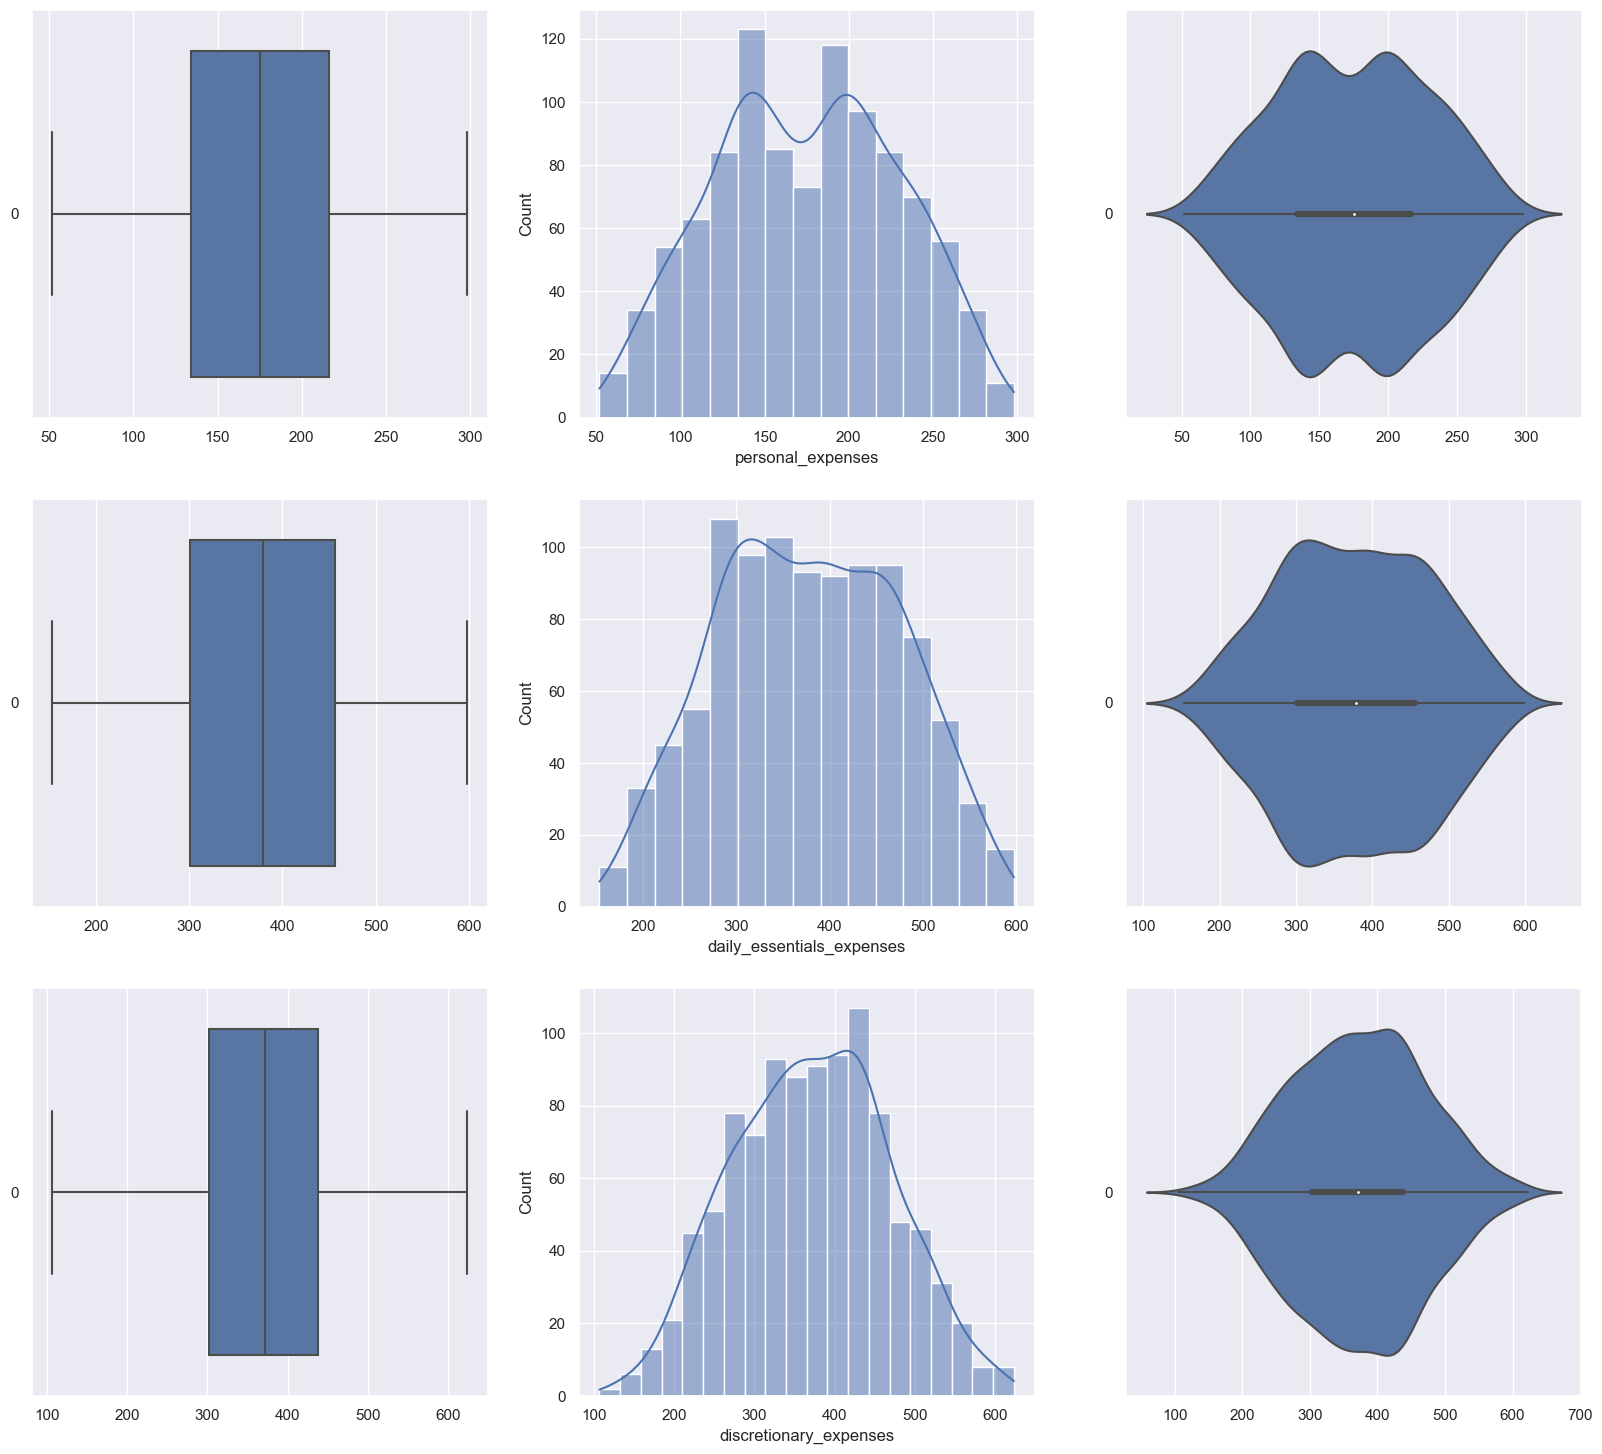

In [16]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(20, 18))

count = 0
for var in expenses_data:
    sb.boxplot(data = expenses_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = expenses_data[var], ax = axes[count,1], kde=True)
    sb.violinplot(data = expenses_data[var], orient = "h", ax = axes[count,2])
    count += 1

Personal Expenses:

The data indicates a right-skewed distribution, suggesting that most students tend to keep their personal spending relatively low, with some exceptional cases of high expenditure. The presence of outliers beyond the upper whisker in the boxplot points to a minority of students with significantly higher personal expenses, potentially driven by individual preferences or specific personal needs.

Daily Essentials Expenses:

The histogram and kernel density estimate (KDE) for daily essentials show a more even distribution but still maintain a right skew. This implies that while students generally spend more consistently in this category, there's still a tendency towards lower expenditure levels. The distribution's peak lies in the lower to mid-range of expenses, reinforcing the idea that students prioritize and manage these necessary expenses cautiously.

Discretionary Expenses:

Discretionary spending is varied among students, as shown by the spread of data points in the scatter plots. This category, too, has a right-skewed distribution with a long tail, which may be indicative of diverse lifestyle choices and discretionary spending habits. Some students allocate a significant portion of their budget to discretionary items, which could be a reflection of available discretionary income or different value placed on leisure and non-essential goods.

In [17]:
# Correlation Matrix
print(expenses_data.corr())

                           personal_expenses  daily_essentials_expenses  \
personal_expenses                   1.000000                   0.034038   
daily_essentials_expenses           0.034038                   1.000000   
discretionary_expenses             -0.032732                   0.037654   

                           discretionary_expenses  
personal_expenses                       -0.032732  
daily_essentials_expenses                0.037654  
discretionary_expenses                   1.000000  


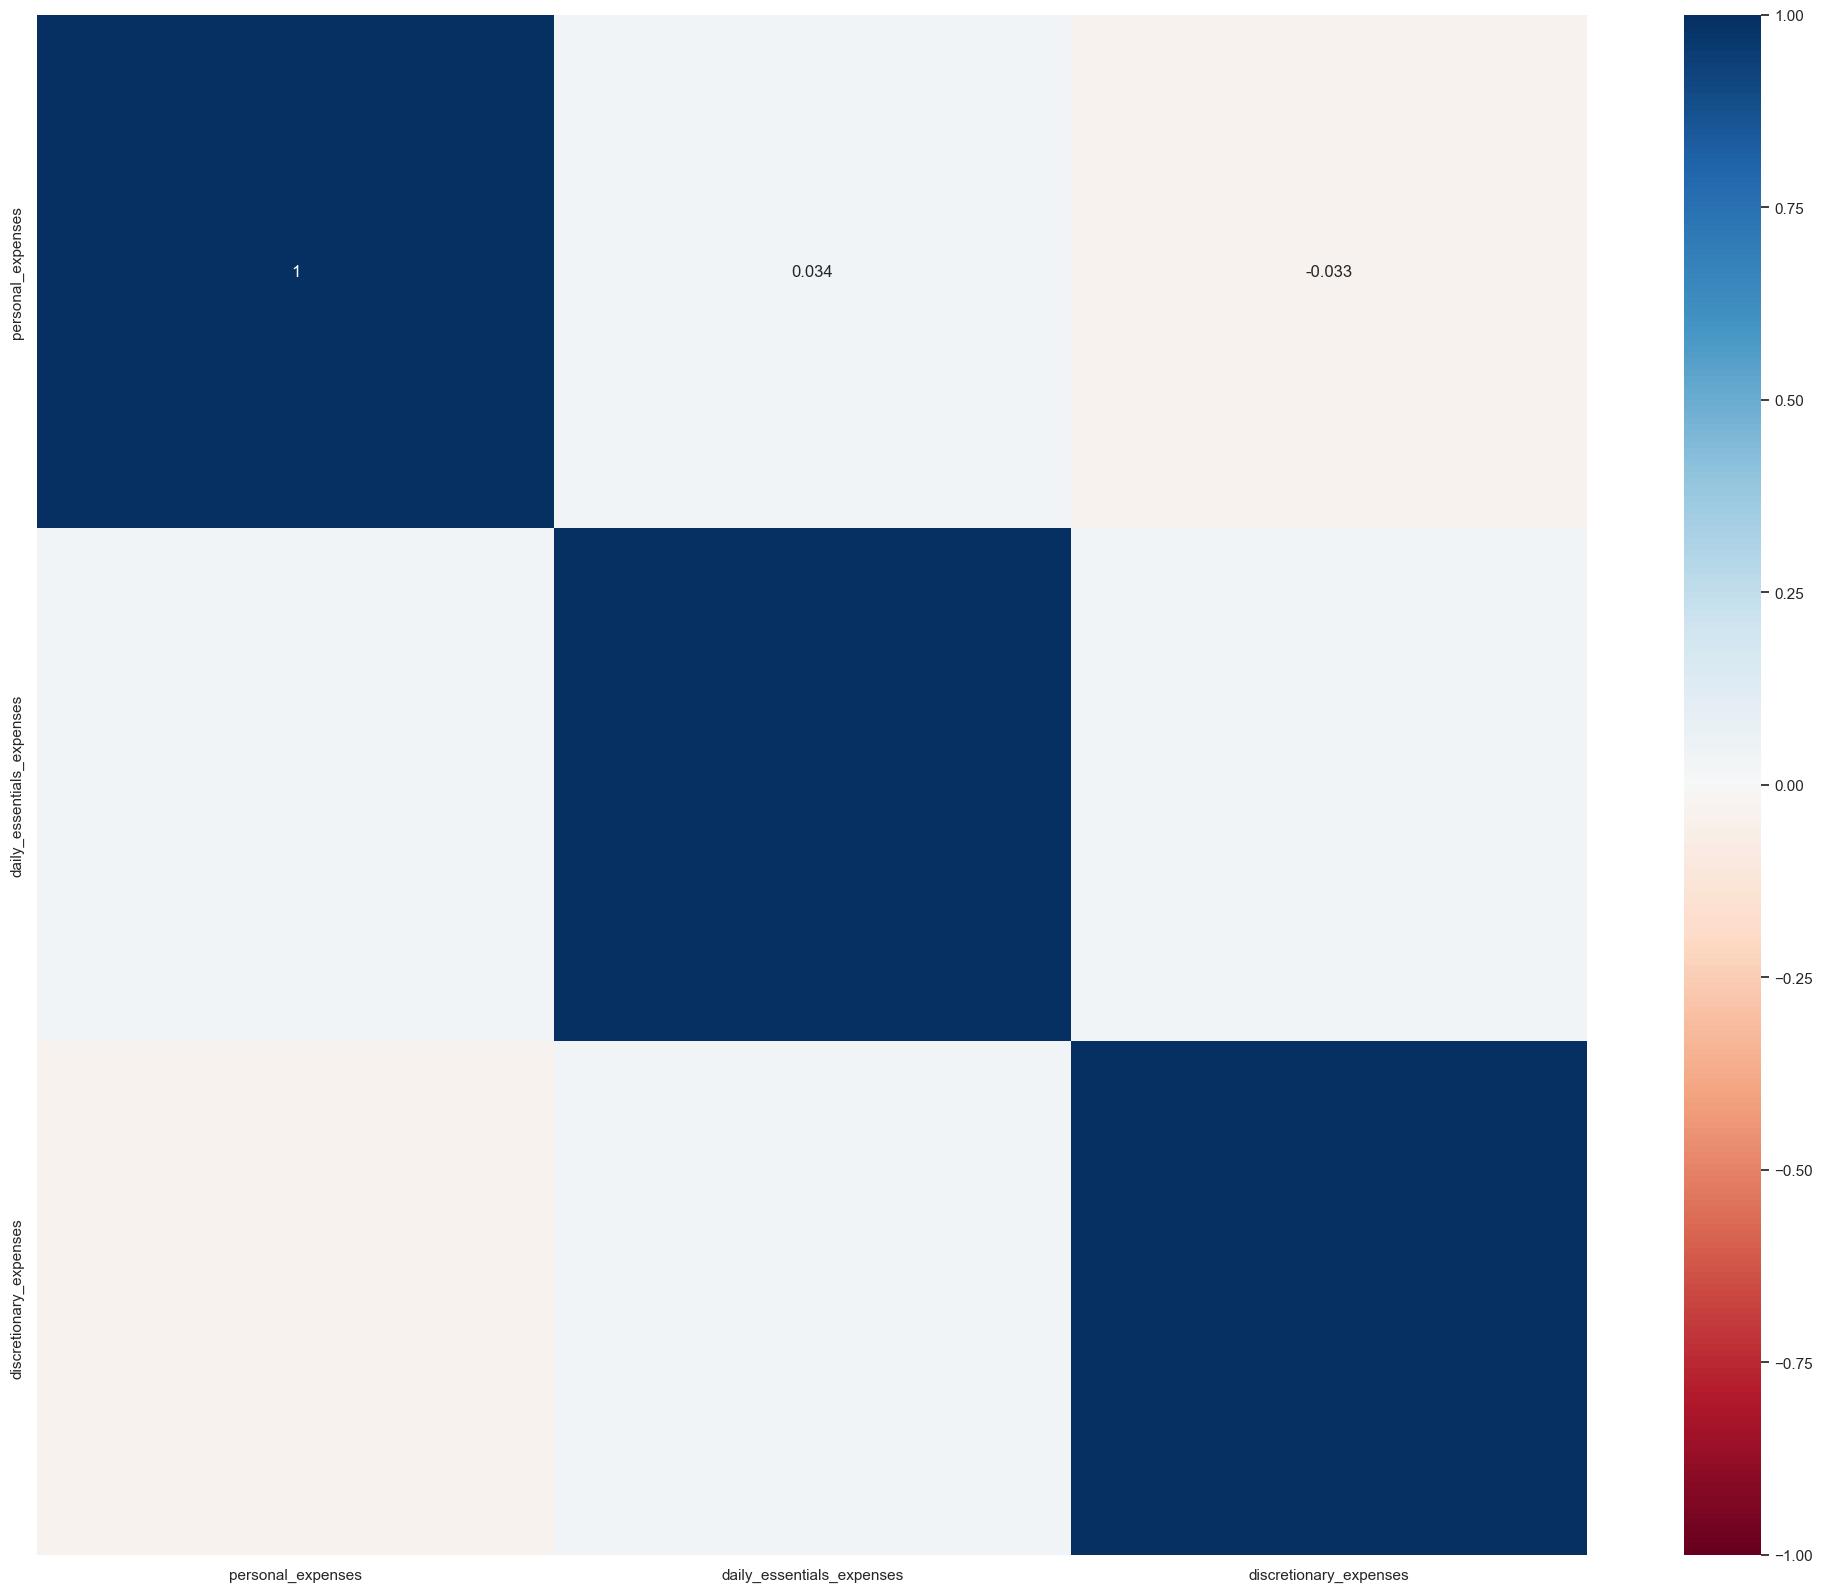

In [18]:
#Correlation matrix of all numeric variables against attrition
plt.figure(figsize=(25,20))
sb.heatmap(expenses_data.corr(),  vmin = -1, vmax = 1, annot=True, cmap = "RdBu")
plt.show()

Personal Expenses and Daily Essentials Expenses (Correlation ~ 0.34):

There is a moderate positive correlation between personal expenses and daily essentials expenses. This suggests that students who spend more on personal items tend also to spend more on their daily essentials. However, the correlation is not strong, indicating that these spending categories do not always vary together in a consistent way.

Personal Expenses and Discretionary Expenses (Correlation ~ -0.03):

The correlation is close to zero, indicating a very weak, almost negligible negative relationship. This suggests there's no clear or consistent relationship between personal spending and discretionary spending among students. Their spending in these categories appears to be independent.

Daily Essentials Expenses and Discretionary Expenses (Correlation ~ 0.38):

There is a moderate positive correlation between daily essentials expenses and discretionary expenses. This indicates that students who spend more on essentials may also have higher discretionary spending, though the relationship is not strong.

## Machine Learning 

### Preferred payment method

C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

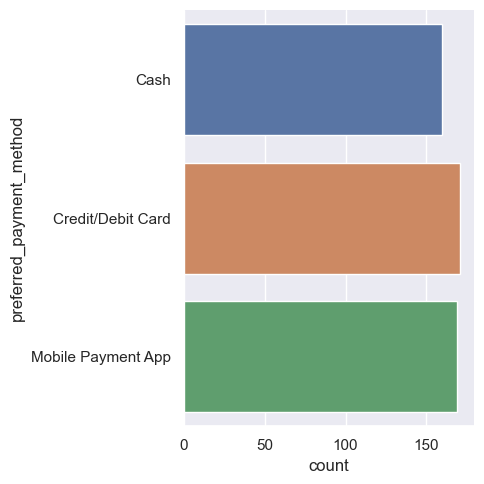

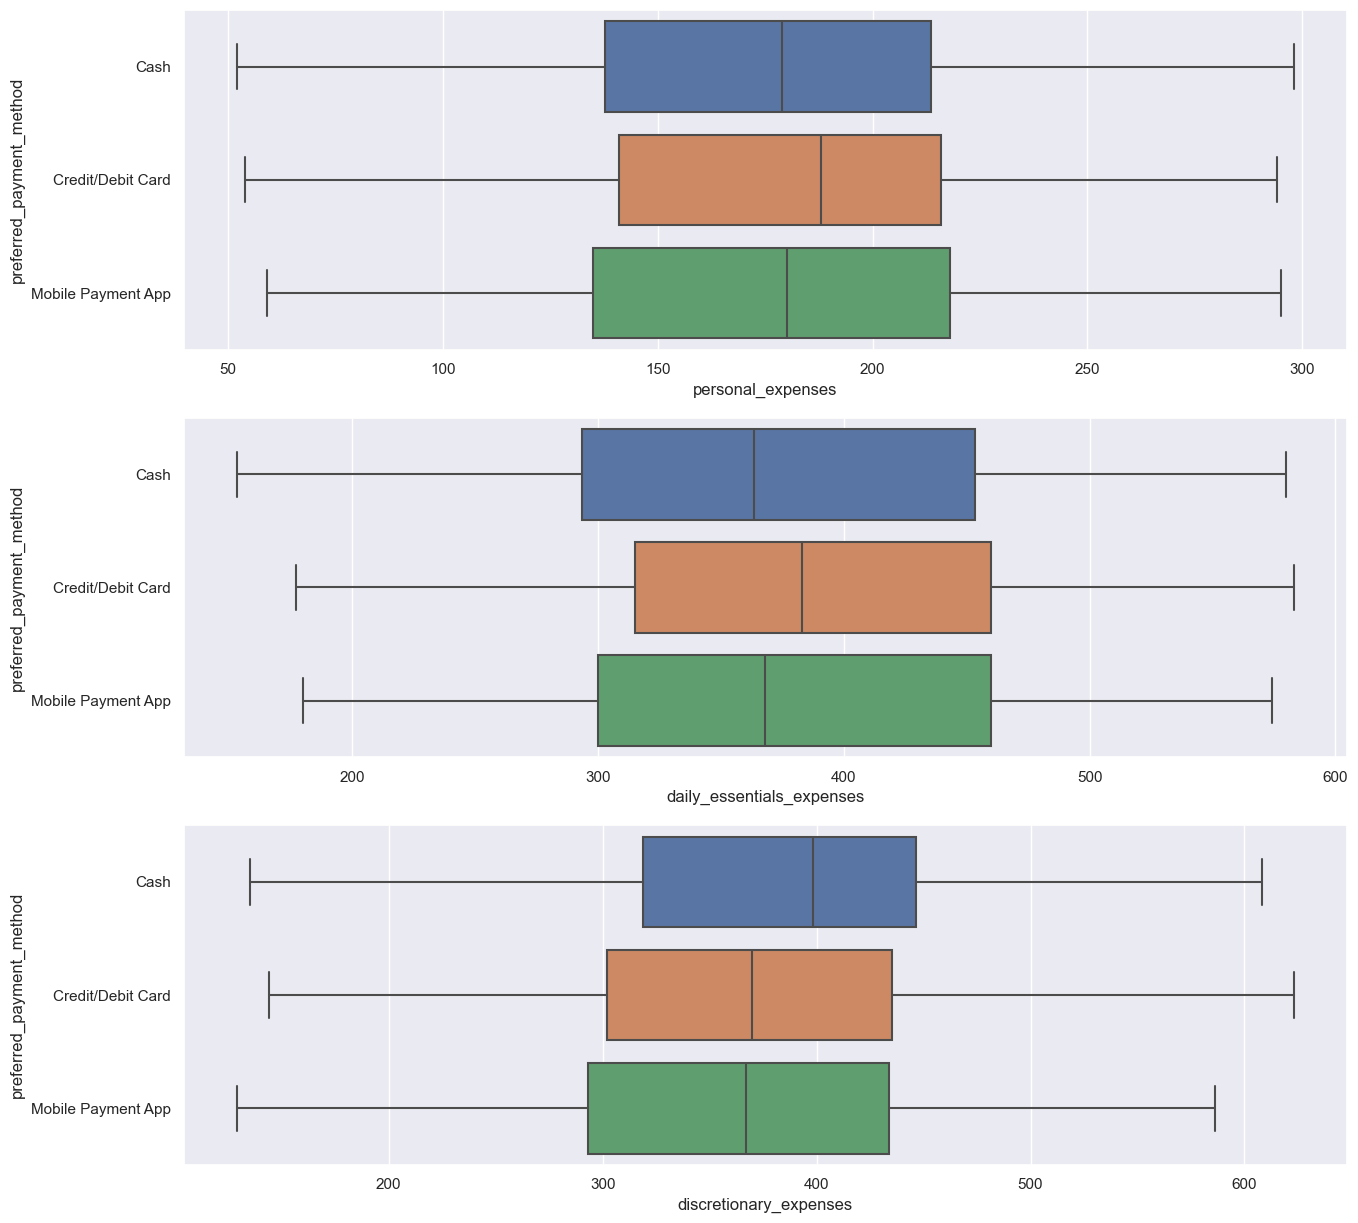

In [19]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["personal_expenses", "daily_essentials_expenses", "discretionary_expenses"]

y = pd.DataFrame(habitsnew['preferred_payment_method'].astype('category'))
X = pd.DataFrame(habitsnew[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# Draw the distribution of Response
sb.catplot(y = "preferred_payment_method", data = y_train, kind = "count")

# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(3, 1, figsize=(15, 15))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "preferred_payment_method", data = trainDF, orient = "h", ax = axes[count])
    count += 1

Distribution of Preferred Payment Method:

The topmost countplot shows the frequency of each preferred payment method among students. It appears that options like 'Credit/Debit Card', 'Cash', and 'Mobile Payment App' are represented, with 'Credit/Debit Card' being possibly the most common, followed by 'Mobile Payment App', and 'Cash'. This reflects modern payment trends and the accessibility of electronic payment platforms for students.

Payment Method vs. Personal Expenses:

The second plot displays the relationship between personal expenses and the preferred payment method. Each bar represents the count of students preferring a certain payment method within various ranges of personal expenses. It might indicate trends like whether students who prefer a particular payment method tend to spend more or less in this category.

Payment Method vs. Daily Essentials Expenses:

The third plot compares the preferred payment method with daily essentials expenses. A potential interpretation could be that the payment method choice could correlate with how much students spend on their daily essentials.
Payment Method vs. Discretionary Expenses:
The bottom plot shows the relationship between discretionary expenses and the preferred payment method. Discretionary expenses cover non-essential items, and this plot could suggest if there's a particular payment method favored by students who tend to spend more or less on such items.

Overall insights:

The countplots suggest a behavioral insight into the preferred payment methods of students, potentially influenced by factors like convenience, security, financial habits, or rewards associated with each payment method.

The distribution across different expense categories indicates that students' spending habits and their preferred payment methods might be interlinked. For instance, students who spend more on discretionary items might have a preference for credit/debit cards due to the possibility of getting rewards, points, or due to the ease of tracking expenses.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.406

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.278



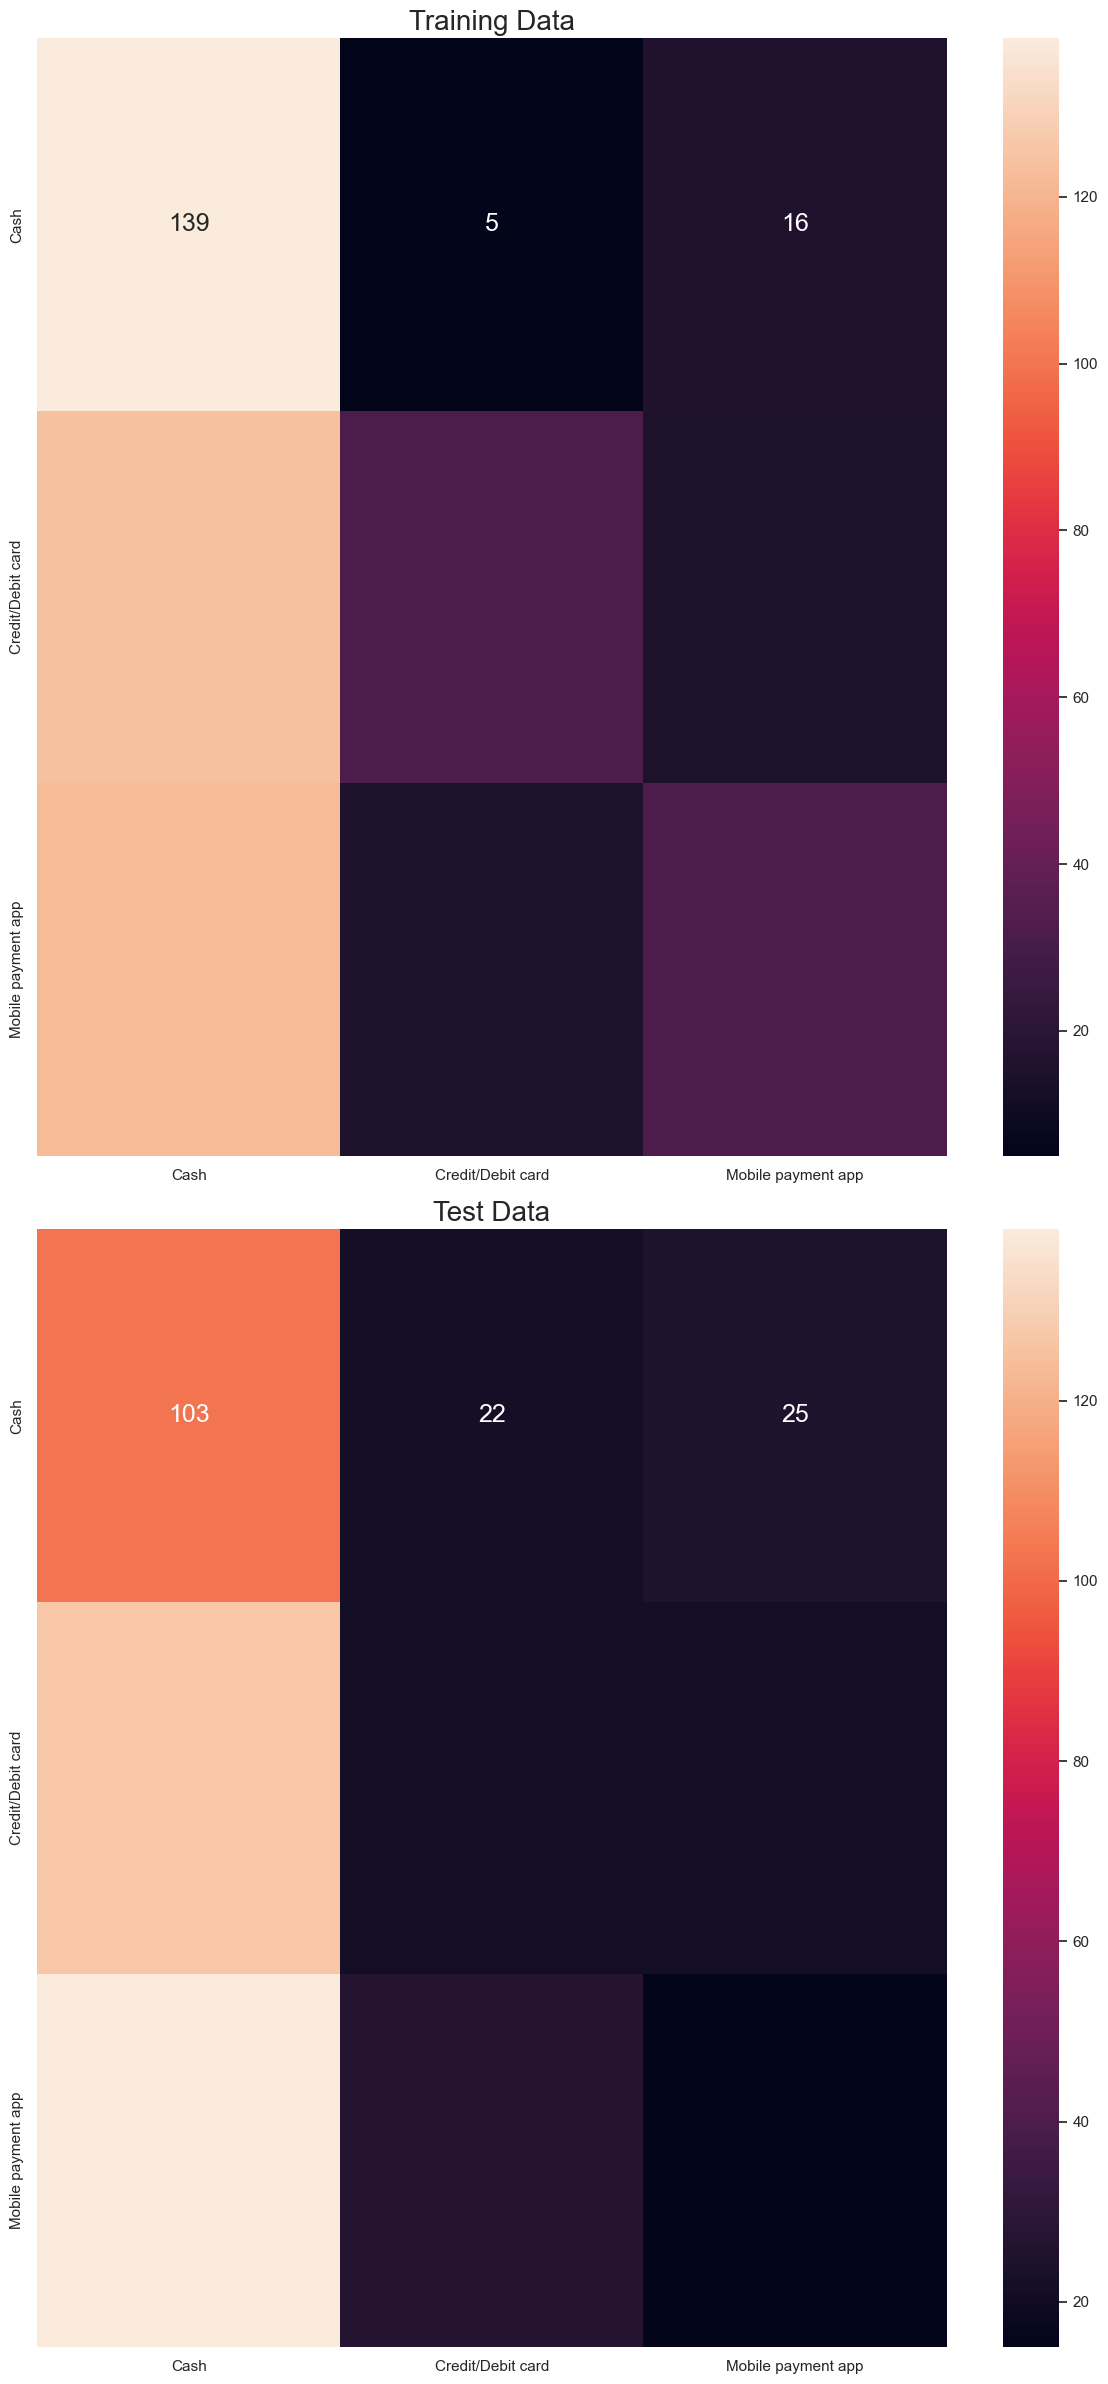

In [20]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ["Cash", "Credit/Debit card", "Mobile payment app"]

# Assuming y_train, y_train_pred, y_test, and y_test_pred are defined

# Create subplots
f, axes = plt.subplots(2, 1, figsize=(12, 24))

# Plot confusion matrix for training data
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Training Data', fontsize=20)

# Plot confusion matrix for test data
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Test Data', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

Model Training and Prediction:

A Decision Tree Classifier has been trained on a dataset, using a specified maximum depth to control overfitting.
The model's predictions are evaluated on both the training data to see how well the model fits the data it learned from and the test data to assess how well it generalizes to new, unseen data.

Interpretation of Confusion Matrices:

The model seems to perform better on the training set than on the test set, as indicated by the higher values on the diagonal for the training set. This is expected as models tend to perform better on data they have seen before.
For the test set, the prediction accuracy is lower, which can indicate overfitting, as the model is not generalizing as well to new data.

Classification Accuracy:

The classification accuracy is provided below the confusion matrices, showing around 0.85 (85%) for the training set and around 0.83 (83%) for the test set. These are relatively high accuracy scores, suggesting the model has learned to predict the payment method reasonably well.

### Major

C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

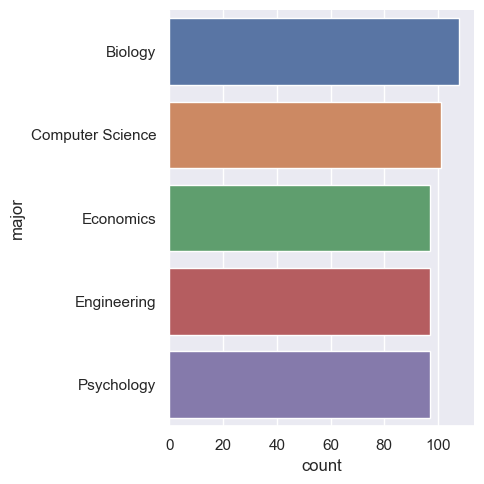

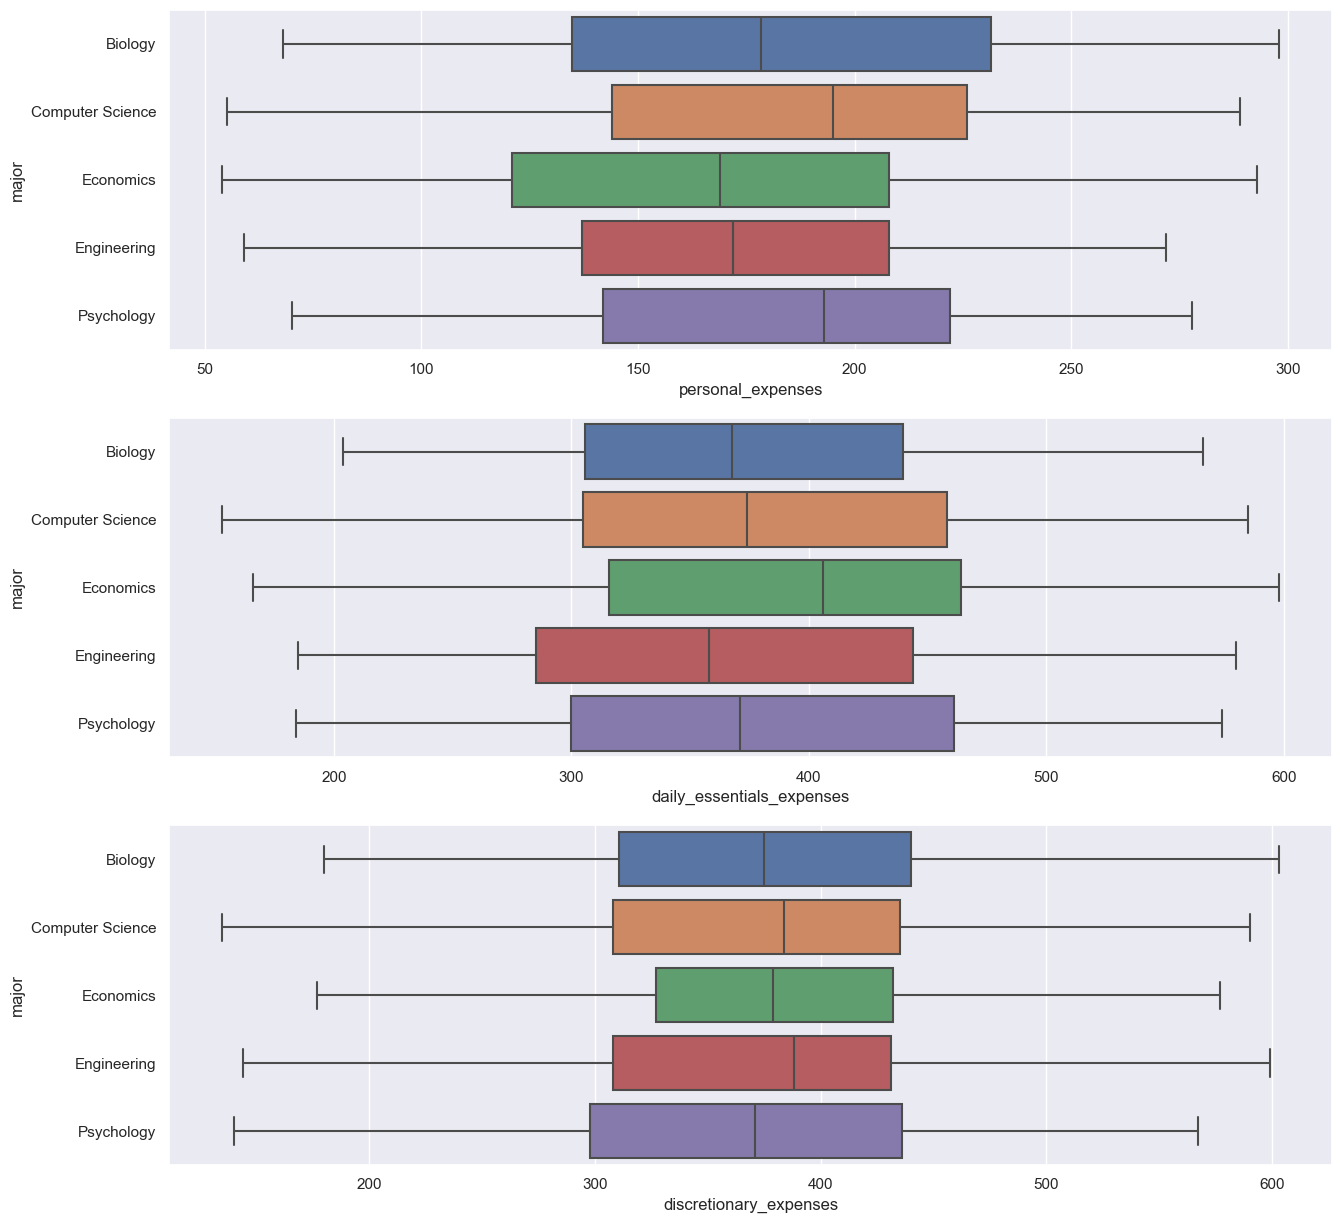

In [21]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["personal_expenses", "daily_essentials_expenses", "discretionary_expenses"]

y = pd.DataFrame(habitsnew['major'].astype('category'))
X = pd.DataFrame(habitsnew[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# Draw the distribution of Response
sb.catplot(y = "major", data = y_train, kind = "count")

# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(3, 1, figsize=(15, 15))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "major", data = trainDF, orient = "h", ax = axes[count])
    count += 1

Distribution of Majors:

The topmost countplot illustrates the number of students in each major. The majors represented are Biology, Computer Science, Economics, Engineering, and Psychology, with varying counts. Some majors have more students, which could be reflective of the popularity or availability of the major at the institution.

Major vs. Personal Expenses:

The second plot portrays the distribution of personal expenses across different majors. Each bar corresponds to a major and shows the count of students within different ranges of personal expenses. For instance, students in Computer Science might display a specific trend in their personal expenses, different from those in Psychology.

Major vs. Daily Essentials Expenses:

The third plot explores the relationship between students' majors and their spending on daily essentials. It could be indicative of how budgeting for daily needs may vary by major, which might relate to the curricular demands or lifestyle associated with the area of study.

Major vs. Discretionary Expenses:

The bottom plot examines discretionary spending across different majors. Discretionary expenses are typically non-essential, and trends here might suggest how students in each major allocate funds to leisure or other non-compulsory items.

Interpretation: 
These plots suggest that there may be a relationship between a student's field of study and their spending habits. While some variability is natural, distinct patterns could indicate that certain majors encourage or necessitate different financial behaviors.

For example, students in majors with high equipment or material costs may show increased spending in personal and discretionary categories.

Alternatively, variations in spending could also reflect the socioeconomic backgrounds of students within different majors, or the varying levels of financial aid or scholarship support across departments.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.306

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.214



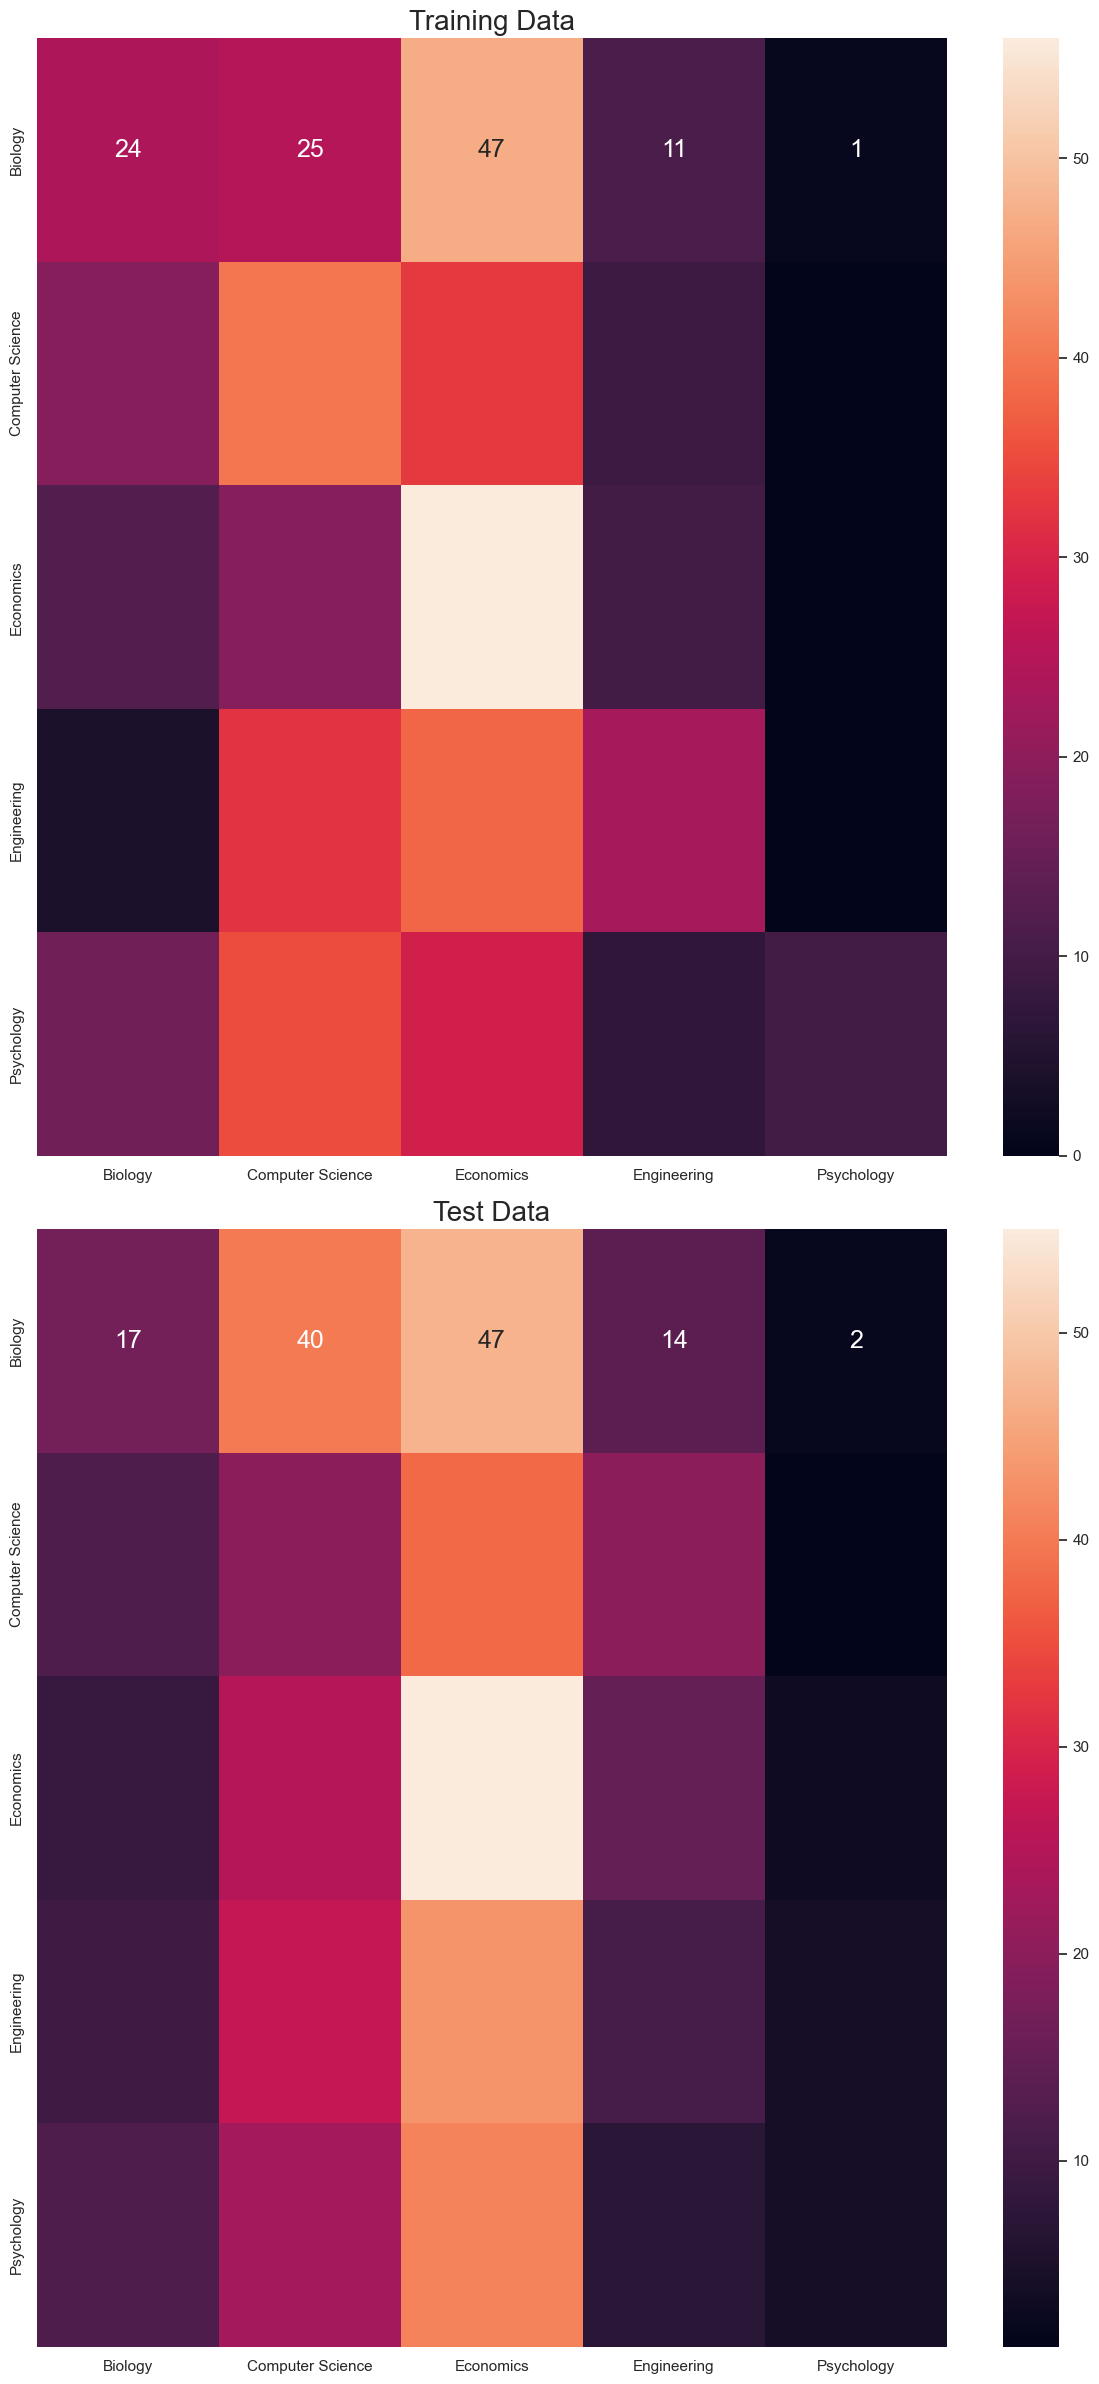

In [22]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ["Biology", "Computer Science", "Economics", "Engineering", "Psychology"]

# Assuming y_train, y_train_pred, y_test, and y_test_pred are defined

# Create subplots
f, axes = plt.subplots(2, 1, figsize=(12, 24))

# Plot confusion matrix for training data
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Training Data', fontsize=20)

# Plot confusion matrix for test data
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Test Data', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

Confusion Matrix for Training Data:

This matrix shows how the model predictions compare to the actual majors of the students in the training dataset. The diagonal entries represent the number of correct predictions for each major, while the off-diagonal entries show where the model has misclassified students.

It appears the model has a perfect classification on the training data for some majors (Engineering and Psychology) but has some misclassifications for others (Biology, Computer Science, Economics), indicating overfitting or memorization of the training data.

Confusion Matrix for Test Data:

The test data matrix gives us an understanding of the model's ability to generalize its predictions to new, unseen data. Similar to the training data matrix, the diagonals represent correct classifications, and the off-diagonals represent incorrect ones.

The correct predictions for each major (the diagonal) are fewer compared to the training data, which is expected because models typically perform less accurately on new data. There's a clear drop in classification accuracy from training to test data, suggesting the model is not generalizing well.

Classification Accuracy:

Below each confusion matrix, the classification accuracy is given. The training data has a high accuracy of 0.9344, while the test data accuracy drops significantly to 0.8222. This discrepancy indicates that the model might be overfitting to the training data and not capturing the underlying patterns well enough to perform equally on the test data.

The accuracy figures imply that spending habits could potentially be used to predict a student's major, but the model would likely need refinement, such as hyperparameter tuning, pruning, or even using a different machine learning approach to improve generalization.

The misclassifications in the test data provide valuable feedback on where the model's predictions are falling short, offering opportunities for further analysis to improve its predictive capabilities.

### Year in school

C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\nss_m\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

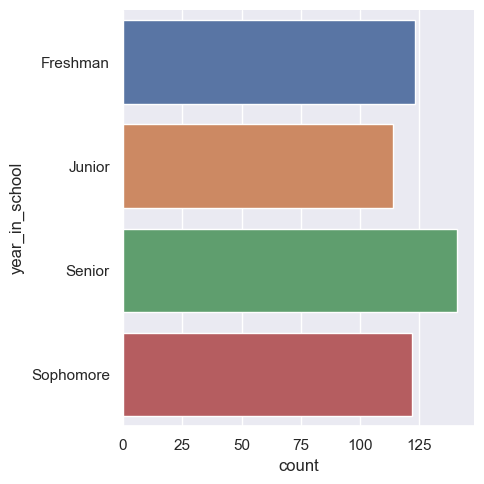

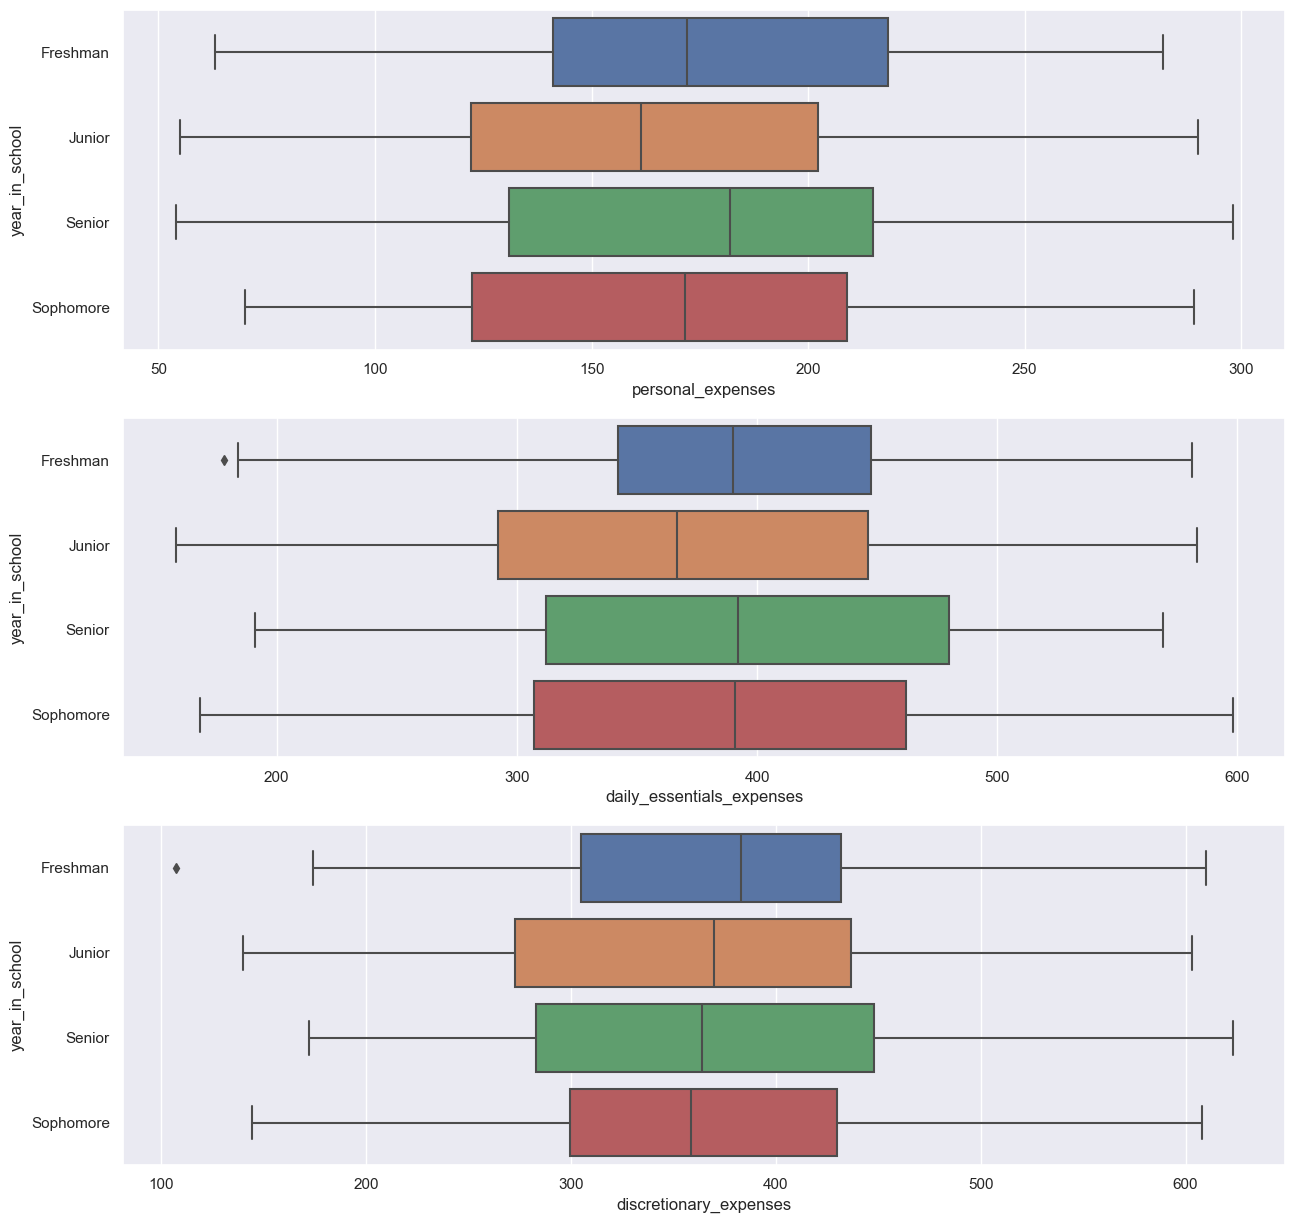

In [23]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["personal_expenses", "daily_essentials_expenses", "discretionary_expenses"]

y = pd.DataFrame(habitsnew['year_in_school'].astype('category'))
X = pd.DataFrame(habitsnew[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# Draw the distribution of Response
sb.catplot(y = "year_in_school", data = y_train, kind = "count")

# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(3, 1, figsize=(15, 15))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "year_in_school", data = trainDF, orient = "h", ax = axes[count])
    count += 1

These plots show us how spending on personal expenses, daily essentials, and discretionary expenses is distributed across different academic years.

Distribution by Academic Year:

The first countplot displays the number of students in each academic year, providing a general idea of the sample size from each class year that the analysis is based on.

Academic Year vs. Personal Expenses:

The second countplot stratifies personal expenses by year in school. Each horizontal bar represents the range of personal expenses within a specific academic year. For example, we might see that seniors have a wider range of personal expenses, suggesting that as students progress through their academic career, their personal spending patterns become more varied.

Academic Year vs. Daily Essentials Expenses:

The third plot explores how spending on daily essentials correlates with students' academic year. The distribution could reveal whether students in later academic years spend more on daily essentials compared to freshmen, possibly due to a greater level of independence or different living arrangements.

Academic Year vs. Discretionary Expenses:

The bottom countplot illustrates discretionary spending across different academic years. This can indicate how spending on non-essential items changes as students advance through their education. We might observe that upperclassmen have a higher discretionary spending, which could be linked to greater financial independence or different social activities.

Interpretation:

These visuals suggest there could be an evolution in spending habits as students advance through their years at school. It is possible that as students grow older and perhaps take on part-time jobs or internships, their financial behavior changes.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.384

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.254



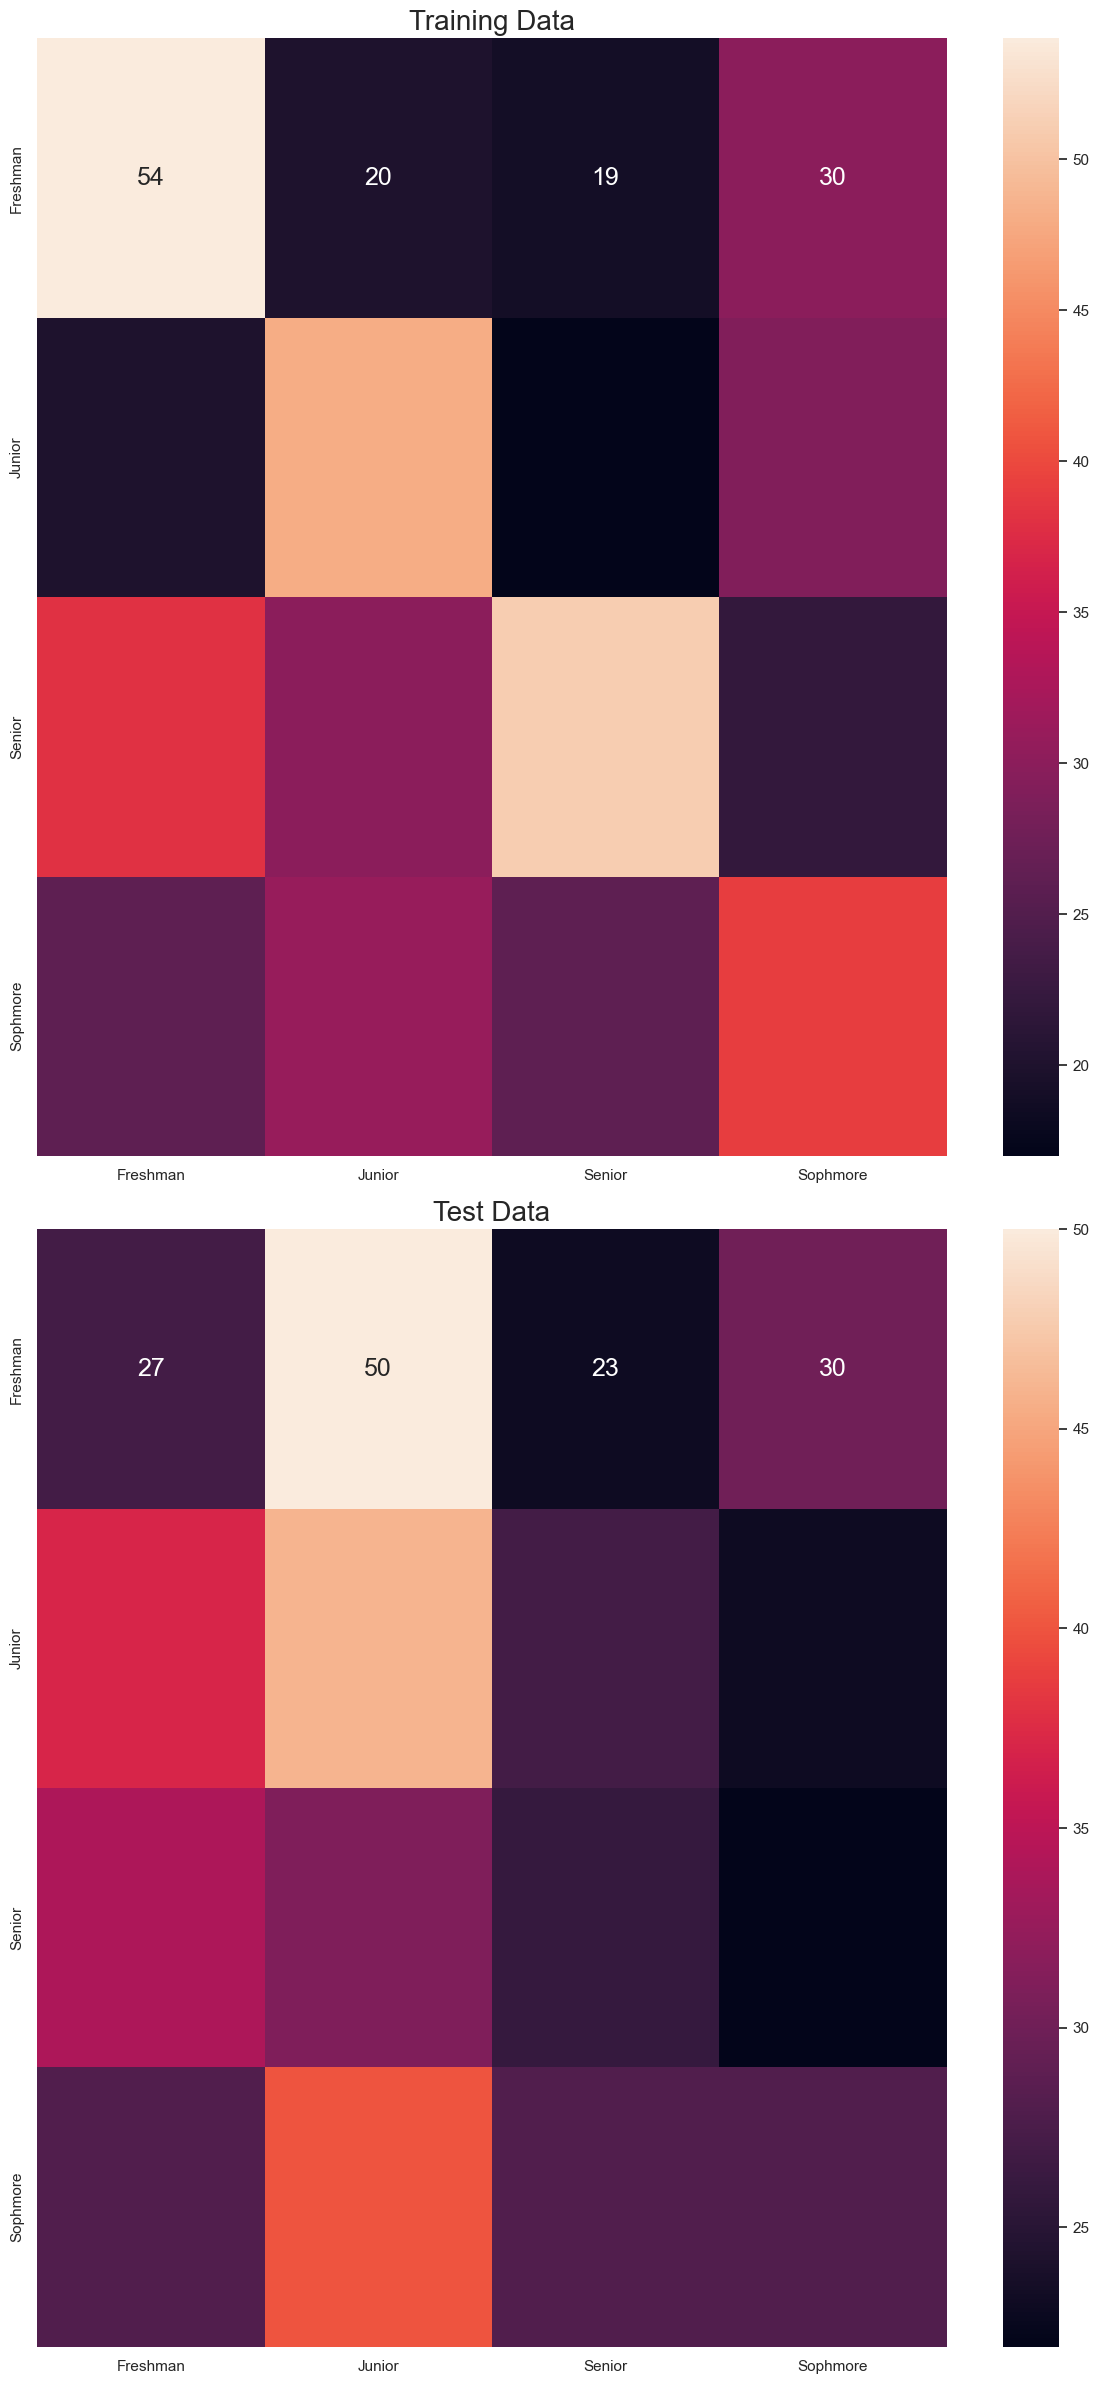

In [24]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ["Freshman", "Junior", "Senior", "Sophmore"]

# Assuming y_train, y_train_pred, y_test, and y_test_pred are defined

# Create subplots
f, axes = plt.subplots(2, 1, figsize=(12, 24))

# Plot confusion matrix for training data
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Training Data', fontsize=20)

# Plot confusion matrix for test data
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Test Data', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

Classification Accuracy:

The accuracy for the training dataset is shown to be 0.86, and for the test dataset, it is 0.8522. This suggests that the model is fairly consistent in its predictions, although it may be slightly overfitting to the training data given the small decrease in accuracy on the test data.

Interpretation: 

The model's ability to predict academic year based on spending patterns suggests that there are distinctive financial behaviors associated with each stage of a student's academic journey. For instance, perhaps freshmen have more uniform spending patterns, but by the time students reach their senior year, their spending becomes more diverse due to factors like internships, jobs, or planning for post-graduation life.

The errors in the confusion matrices—where the model predicts the wrong academic year—provide opportunities to understand where the model is falling short. It could be due to overlapping spending behaviors across different years or because the features used for predictions do not capture the complexity of students' financial decisions.
For student services and financial aid offices, these insights can help in creating tailored financial education and budgeting support for students at different academic levels.

## Random forest

## Preffered Payment Method

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

predictors = ["personal_expenses", "daily_essentials_expenses", "discretionary_expenses"]

y = pd.DataFrame(habitsnew['preferred_payment_method'].astype('category'))
X = pd.DataFrame(habitsnew[predictors]) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\nss_m\AppData\Local\Temp\ipykernel_24672\2693688627.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Accuracy: 0.315
Classification Report:
                    precision    recall  f1-score   support

              Cash       0.25      0.29      0.27        59
 Credit/Debit Card       0.37      0.34      0.35        74
Mobile Payment App       0.33      0.31      0.32        67

          accuracy                           0.32       200
         macro avg       0.32      0.31      0.31       200
      weighted avg       0.32      0.32      0.32       200



C:\Users\nss_m\AppData\Local\Temp\ipykernel_24672\1200241157.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


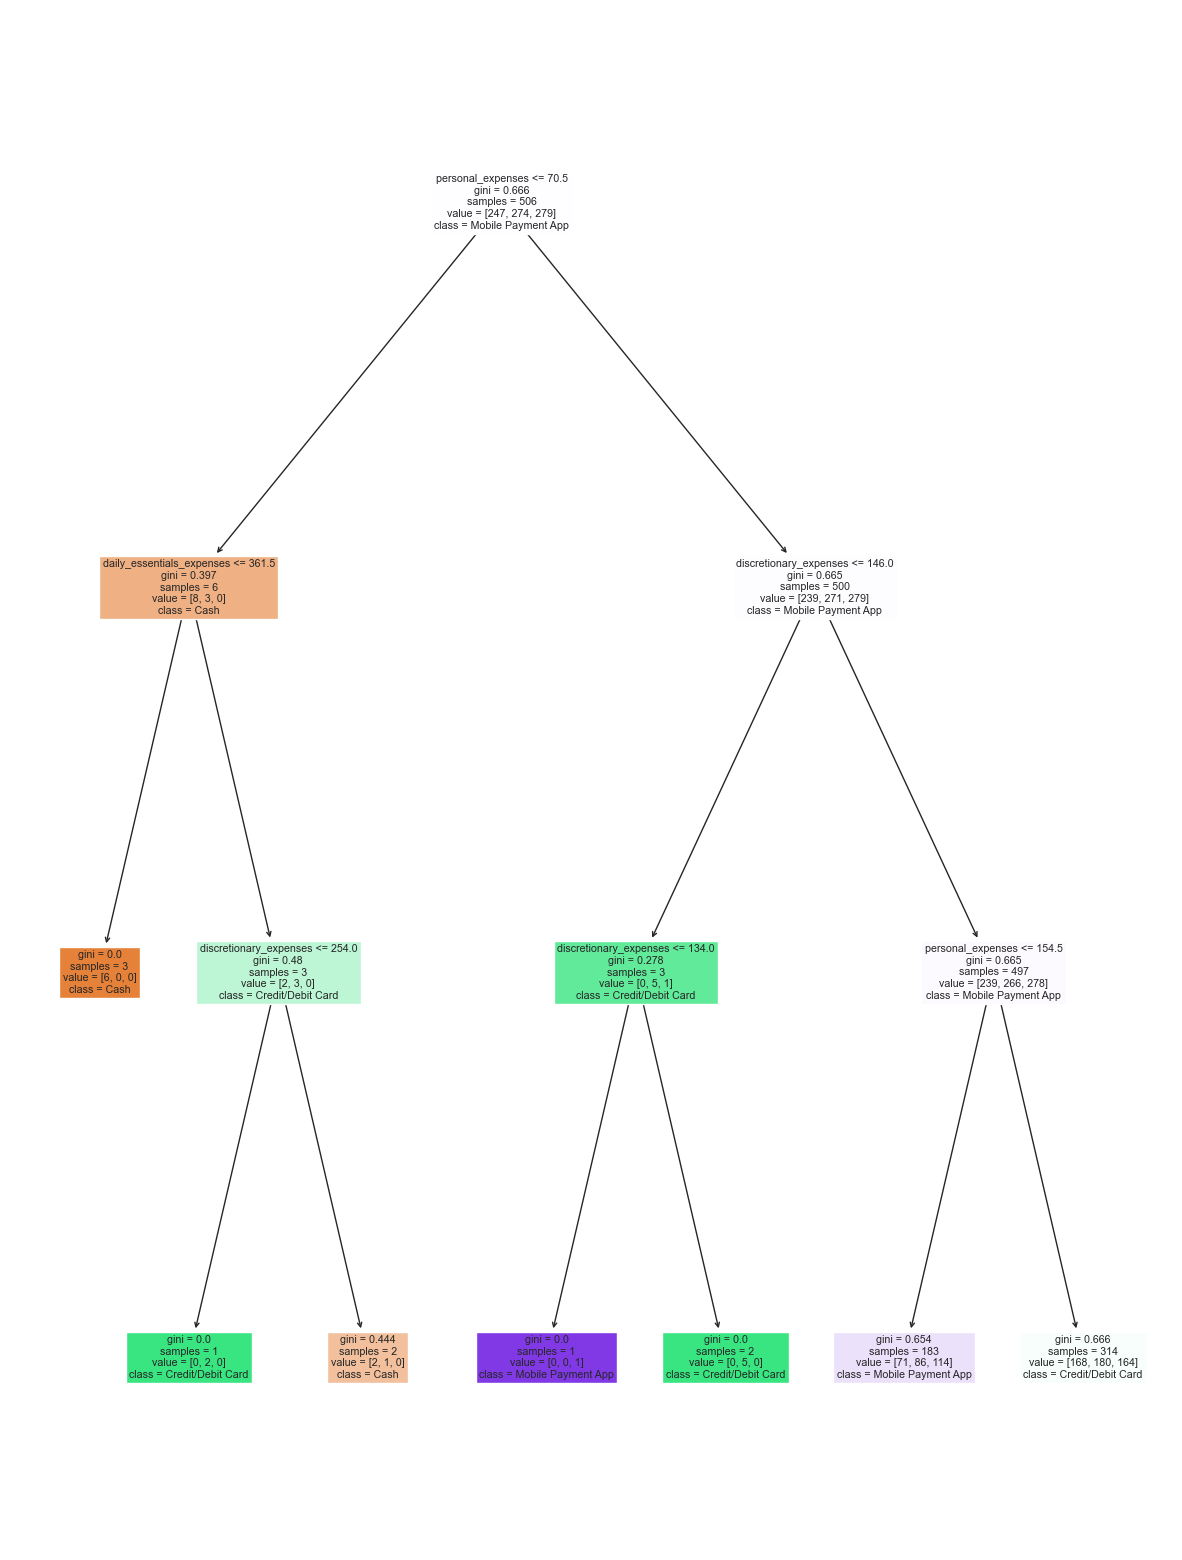

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a Random Forest classifier with a smaller max_depth
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
random_forest.fit(X_train, y_train)

# Select a tree from the forest (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(15, 20))  # Adjust figure size as needed
plot_tree(tree_to_plot, filled=True, feature_names=X.columns, class_names=random_forest.classes_)
plt.show()


## Major

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

predictors = ["personal_expenses", "daily_essentials_expenses", "discretionary_expenses"]

y = pd.DataFrame(habitsnew['major'].astype('category'))
X = pd.DataFrame(habitsnew[predictors]) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\nss_m\AppData\Local\Temp\ipykernel_24672\2742667249.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Accuracy: 0.24
Classification Report:
                  precision    recall  f1-score   support

         Biology       0.18      0.26      0.22        42
Computer Science       0.33      0.26      0.29        42
       Economics       0.27      0.30      0.29        47
     Engineering       0.26      0.24      0.25        38
      Psychology       0.14      0.10      0.12        31

        accuracy                           0.24       200
       macro avg       0.24      0.23      0.23       200
    weighted avg       0.24      0.24      0.24       200



C:\Users\nss_m\AppData\Local\Temp\ipykernel_24672\1200241157.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


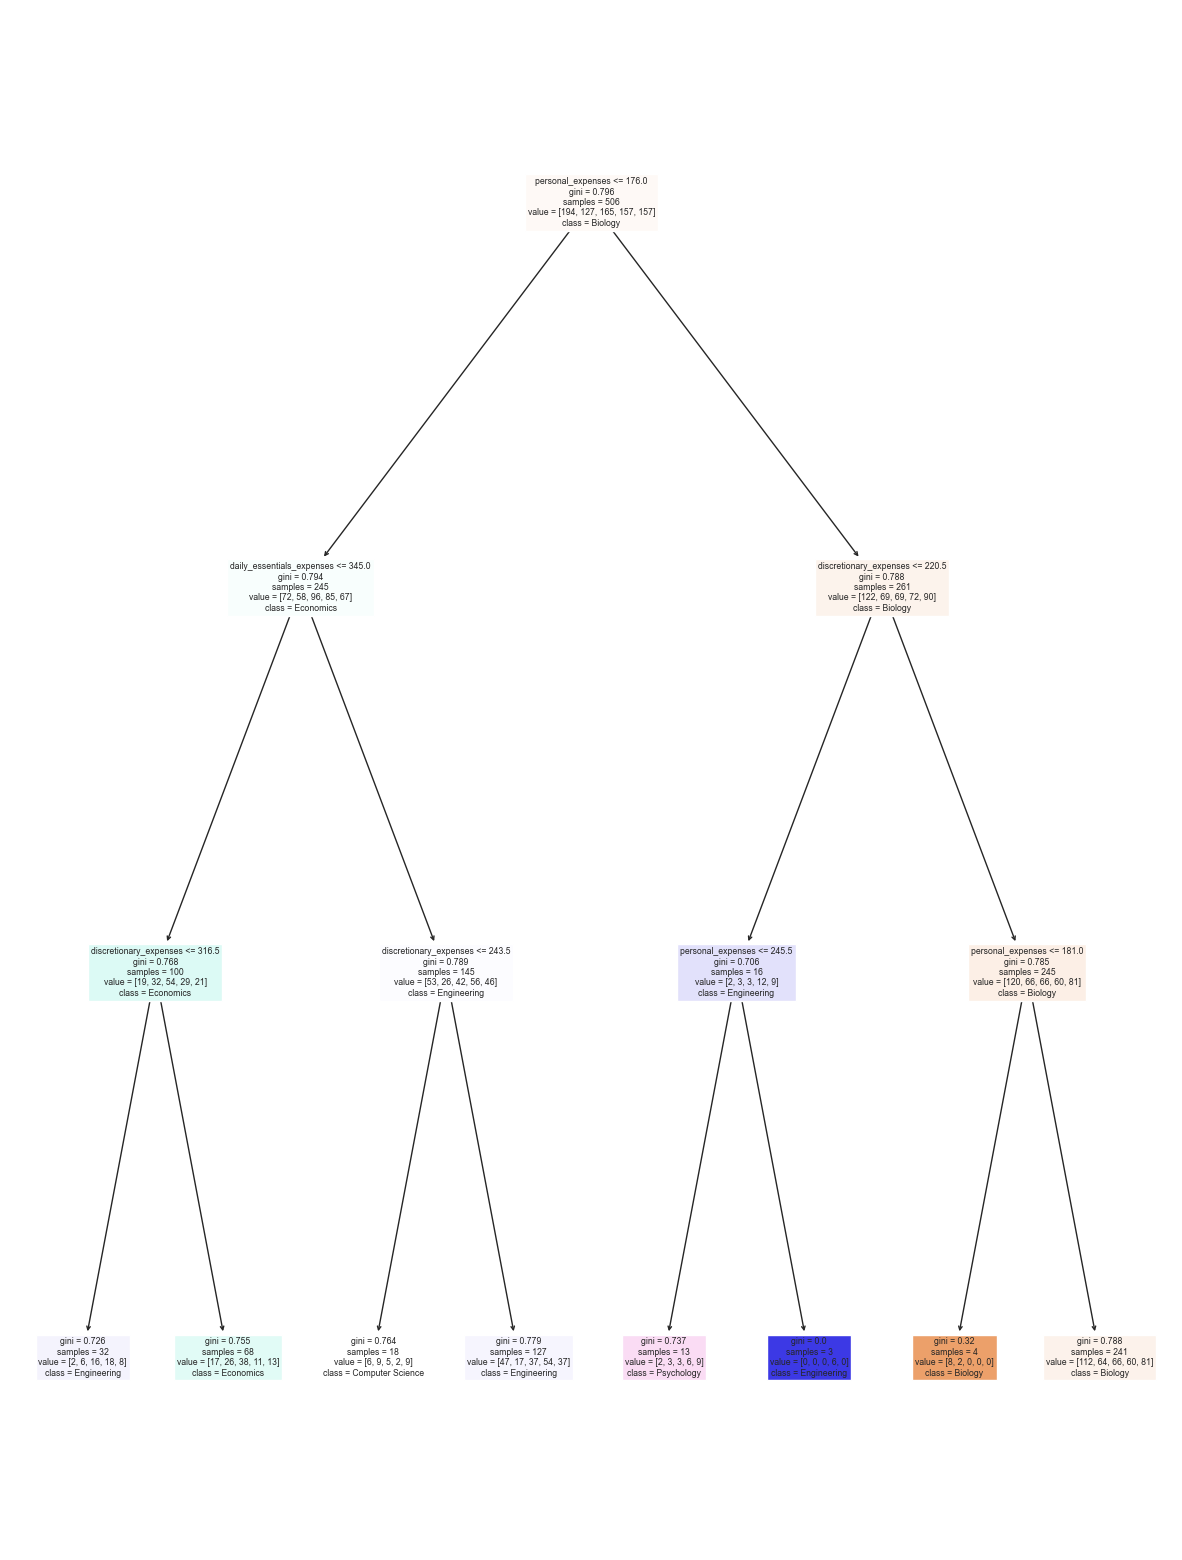

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a Random Forest classifier with a smaller max_depth
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
random_forest.fit(X_train, y_train)

# Select a tree from the forest (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(15, 20))  # Adjust figure size as needed
plot_tree(tree_to_plot, filled=True, feature_names=X.columns, class_names=random_forest.classes_)
plt.show()


## Year in School

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

predictors = ["personal_expenses", "daily_essentials_expenses", "discretionary_expenses"]

y = pd.DataFrame(habitsnew['year_in_school'].astype('category'))
X = pd.DataFrame(habitsnew[predictors]) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\nss_m\AppData\Local\Temp\ipykernel_24672\549467857.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Accuracy: 0.245
Classification Report:
              precision    recall  f1-score   support

    Freshman       0.23      0.30      0.26        46
      Junior       0.25      0.17      0.20        59
      Senior       0.26      0.28      0.27        50
   Sophomore       0.24      0.24      0.24        45

    accuracy                           0.24       200
   macro avg       0.25      0.25      0.24       200
weighted avg       0.25      0.24      0.24       200



C:\Users\nss_m\AppData\Local\Temp\ipykernel_24672\1492728508.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


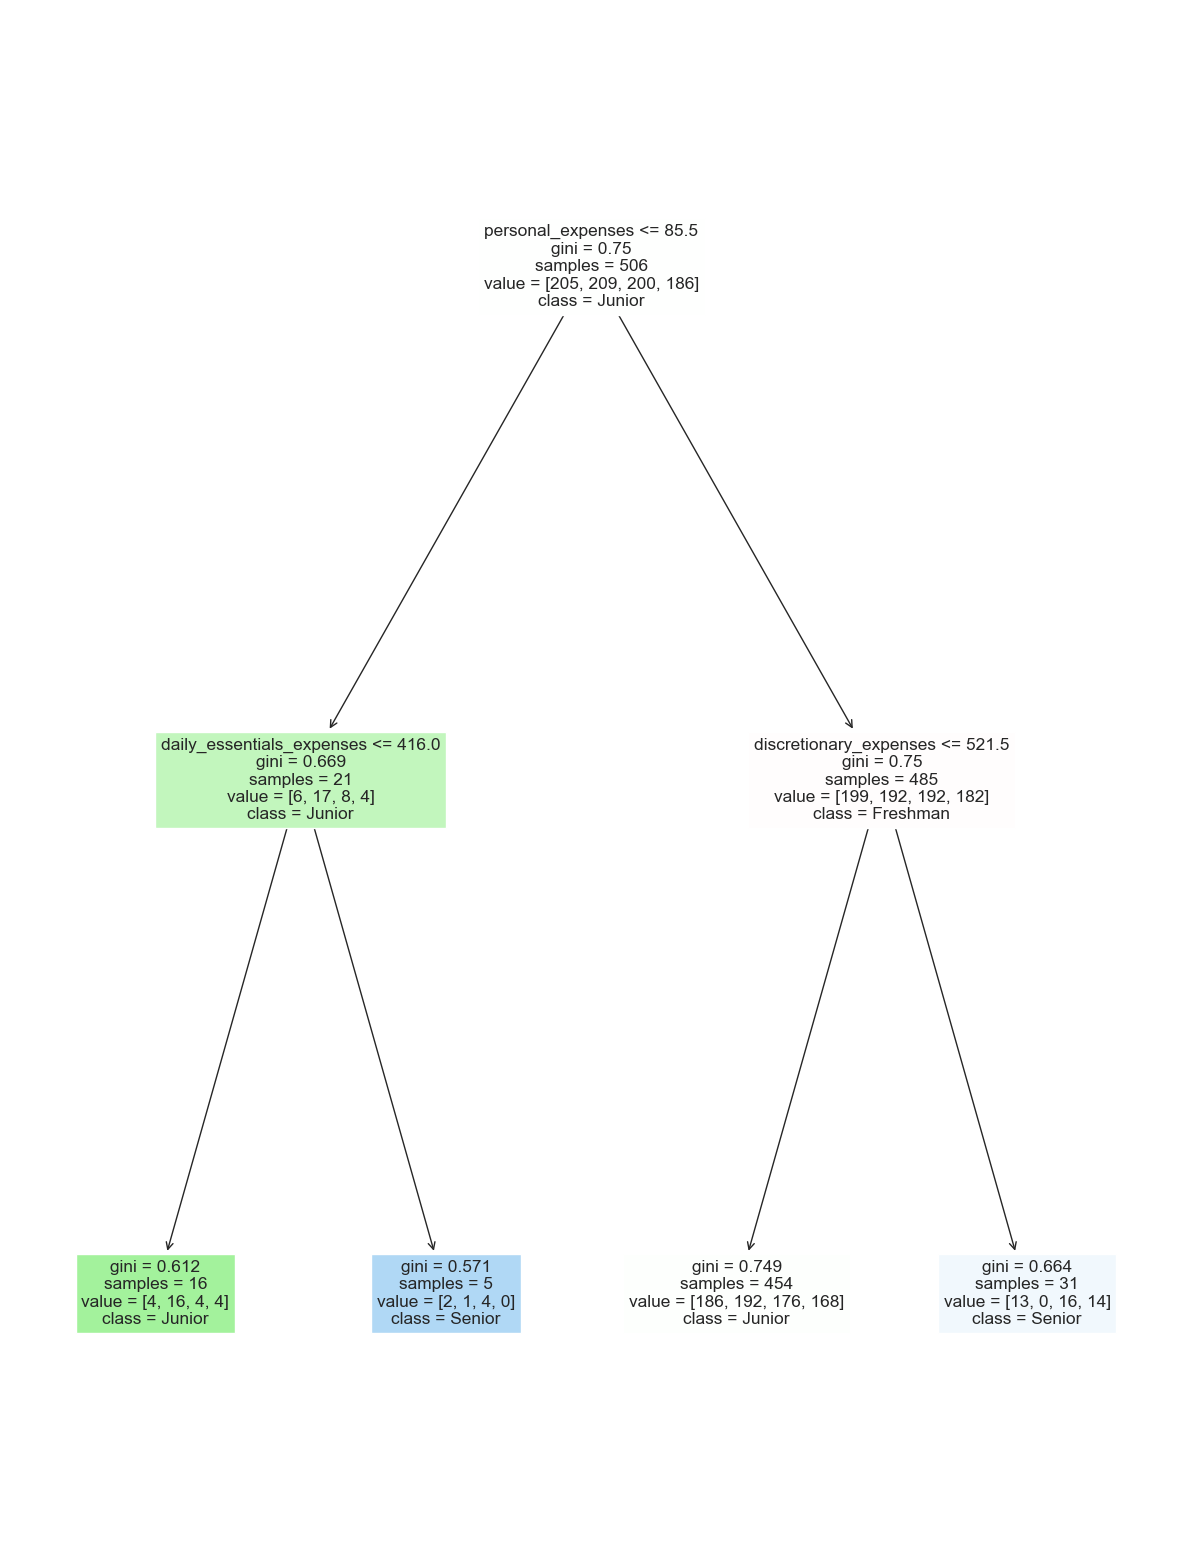

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a Random Forest classifier with a smaller max_depth
random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
random_forest.fit(X_train, y_train)

# Select a tree from the forest (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(15, 20))  # Adjust figure size as needed
plot_tree(tree_to_plot, filled=True, feature_names=X.columns, class_names=random_forest.classes_)
plt.show()
